# Trabajo Final Inteligencia Artificial
Alumnos: Lucas Soria y Alejandro Marotta

Tema: TechTober y TechTember

## Cargar Token 


In [1]:
import os
from dotenv import load_dotenv
import pandas as pd
import requests

load_dotenv()  # Cargar valores del archivo .env en las variables de entorno

bearer_token = os.environ.get("BEARER_TOKEN")

### Para poder visualizar mayor cantidad de resultados

In [2]:
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 2000

## Definir URL y Parametros de la consulta

In [ ]:
url = "https://api.twitter.com/2/tweets/search/recent"
headers = {
    "Authorization": f"Bearer {bearer_token}",
    "User-Agent": "v2FullArchiveSearchPython"
}
words = '#techtember OR #techtober OR tectober OR tectember'
params = {
    'query': f'{words} lang:en -is:retweet',
    'max_results': 100
}

## Creamos una funcion para obtener los datos y formatear la respuesta


In [ ]:
def get_data(url, params):
    results = []
    while True:
        response = requests.get(url, headers=headers, params=params)
        # Generar excepción si la respuesta no es exitosa
        if response.status_code != 200:
            raise Exception(response.status_code, response.text)
        data = response.json()['data']
        meta_data = dict(response.json())['meta']
        results.append(pd.json_normalize(data))
        if 'next_token' not in meta_data:
            break
        else:
            token = meta_data['next_token']
            print(token)
            params = {
                'query': f'{words} lang:en -is:retweet',
                'next_token': token,
            }
    return pd.concat(results)

## Obtener los datos

In [ ]:
df = get_data(url, params)
print(df)
df.to_csv('TechTweets1.csv')

# Tokenizacion

In [3]:
df = pd.read_csv("TechTweets1.csv") #para no volver a pedir los datos
df

,Unnamed: 0,id,text
0,0,1452750027919613953,"RT @MKBHD: Fun fact, right in the middle of #t..."
1,1,1452741092491862016,RT @SuperSaf: I hear there will be a LOT of vi...
2,2,1452731032294264842,"RT @MKBHD: Fun fact, right in the middle of #t..."
3,3,1452726727050936326,"RT @MKBHD: Fun fact, right in the middle of #t..."
4,4,1452726584234938377,RT @willduwiildu: I hear there will be a LOT o...
5,5,1452726517482594304,I love #techtober
6,6,1452723771563917313,"RT @MKBHD: Fun fact, right in the middle of #t..."
7,7,1452707541276823556,"RT @MKBHD: Fun fact, right in the middle of #t..."
8,8,1452704500138057739,"RT @MKBHD: Fun fact, right in the middle of #t..."
9,9,1452695063889203202,"RT @MKBHD: Fun fact, right in the middle of #t..."


## Filtrar Columnas

In [4]:
df = df[['text']]
df
df2 = df
df = df2

## Tokenizar


In [5]:
from nltk.tokenize import TweetTokenizer
# Instanciar Tokenizer
tt = TweetTokenizer()
# Aplicar Tokenizer a la columna
tokenized_text = df['text'].apply(tt.tokenize)
df["tokenized_text"] = tokenized_text
df

<ipython-input-5-5859806c120e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tokenized_text"] = tokenized_text


,text,tokenized_text
0,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ..."
1,RT @SuperSaf: I hear there will be a LOT of vi...,"[RT, @SuperSaf, :, I, hear, there, will, be, a..."
2,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ..."
3,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ..."
4,RT @willduwiildu: I hear there will be a LOT o...,"[RT, @willduwiildu, :, I, hear, there, will, b..."
5,I love #techtober,"[I, love, #techtober]"
6,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ..."
7,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ..."
8,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ..."
9,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ..."


## Obtener Frecuencia de cada termino

### Poner todo en minuscula

In [9]:
tokenized_list = df.explode('tokenized_text')
tokenized_list_text = tokenized_list['tokenized_text']

tokenized_list_text_min = list(map(str.lower,tokenized_list_text))
tokenized_list_text_min
    

['rt',
 '@mkbhd',
 ':',
 'fun',
 'fact',
 ',',
 'right',
 'in',
 'the',
 'middle',
 'of',
 '#techtober',
 'is',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championships',
 ',',
 'which',
 'is',
 'where',
 "i've",
 'been',
 'for',
 'the',
 '…',
 'rt',
 '@supersaf',
 ':',
 'i',
 'hear',
 'there',
 'will',
 'be',
 'a',
 'lot',
 'of',
 'videos',
 'dropping',
 'today',
 '?',
 '🤔',
 '#techtober',
 'rt',
 '@mkbhd',
 ':',
 'fun',
 'fact',
 ',',
 'right',
 'in',
 'the',
 'middle',
 'of',
 '#techtober',
 'is',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championships',
 ',',
 'which',
 'is',
 'where',
 "i've",
 'been',
 'for',
 'the',
 '…',
 'rt',
 '@mkbhd',
 ':',
 'fun',
 'fact',
 ',',
 'right',
 'in',
 'the',
 'middle',
 'of',
 '#techtober',
 'is',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championships',
 ',',
 'which',
 'is',
 'where',
 "i've",
 'been',
 'for',
 'the',
 '…',
 'rt',
 '@willduwiildu',
 ':',
 'i',
 'hear',
 'there',
 'will',
 'be',
 'a',
 'lot',
 'of',
 

### Hacer una primera limpieza
La idea es que no sea tan profunda para no elimanar hastag, menciones, ni emoticones.
Se limpian los simbolos raros que estan solos y todos los links con spam


In [10]:
caracteres_a_eliminar = ("http","https","[","]","{","}","#","@","!","’",",",";",".",":","+","/","*","'","?","¿","¡","!","|","ª","/","~","¬","%","&","(",")","=","-","...",'…',"_")


for i in caracteres_a_eliminar:    
    if i in tokenized_list_text_min:
        tokenized_list_text_min = list(filter(lambda val: val !=  i, tokenized_list_text_min))
        
for j in range(2):
    for i in tokenized_list_text_min:
        if ("http" in i) or ("t.co" in i) or ("https://t.co/" in i):             
            tokenized_list_text_min.remove(i)
    

tokenized_list_text_min

['rt',
 '@mkbhd',
 'fun',
 'fact',
 'right',
 'in',
 'the',
 'middle',
 'of',
 '#techtober',
 'is',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championships',
 'which',
 'is',
 'where',
 "i've",
 'been',
 'for',
 'the',
 'rt',
 '@supersaf',
 'i',
 'hear',
 'there',
 'will',
 'be',
 'a',
 'lot',
 'of',
 'videos',
 'dropping',
 'today',
 '🤔',
 '#techtober',
 'rt',
 '@mkbhd',
 'fun',
 'fact',
 'right',
 'in',
 'the',
 'middle',
 'of',
 '#techtober',
 'is',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championships',
 'which',
 'is',
 'where',
 "i've",
 'been',
 'for',
 'the',
 'rt',
 '@mkbhd',
 'fun',
 'fact',
 'right',
 'in',
 'the',
 'middle',
 'of',
 '#techtober',
 'is',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championships',
 'which',
 'is',
 'where',
 "i've",
 'been',
 'for',
 'the',
 'rt',
 '@willduwiildu',
 'i',
 'hear',
 'there',
 'will',
 'be',
 'a',
 'lot',
 'of',
 'videos',
 'dropping',
 'today',
 '🤔',
 '#techtober',
 'i',
 'love',
 '#techtober',
 'rt',

### Obtener frecuencia

In [11]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_list_text_min)
fdist

FreqDist({'the': 477, 'is': 443, '#techtober': 384, 'rt': 272, 'of': 267, 'in': 214, 'for': 214, '@mkbhd': 206, 'which': 200, 'been': 199, ...})

### Convertir en Data Frame


In [12]:
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
df_fdist.sort_values(by=['Frequency'], inplace=True)
df_fdist

,Frequency
Term,
#filmmaking,1
least,1
😉,1
third,1
#bigevent,1
#bespoke,1
#galaxyunpackedpart2,1
#galaxyzfold3,1
opn,1


## Primera nube de palabras con limpieza poca profunda

### Importar librerias

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

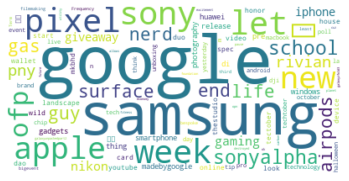

In [16]:
# Generar nube de palabras
wordcloud = WordCloud(max_words=100, background_color="white").generate(df_fdist.to_string())

# Mostrar gráfico
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams['figure.figsize'] = [500, 500]
plt.show()

## Quitar Stop Words

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

tokenized_list_text_no_stopwords = [x for x in tokenized_list_text_min if not x.lower() in stop_words]

tokenized_list_text_no_stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['rt',
 '@mkbhd',
 'fun',
 'fact',
 'right',
 'middle',
 '#techtober',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championships',
 "i've",
 'rt',
 '@supersaf',
 'hear',
 'lot',
 'videos',
 'dropping',
 'today',
 '🤔',
 '#techtober',
 'rt',
 '@mkbhd',
 'fun',
 'fact',
 'right',
 'middle',
 '#techtober',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championships',
 "i've",
 'rt',
 '@mkbhd',
 'fun',
 'fact',
 'right',
 'middle',
 '#techtober',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championships',
 "i've",
 'rt',
 '@willduwiildu',
 'hear',
 'lot',
 'videos',
 'dropping',
 'today',
 '🤔',
 '#techtober',
 'love',
 '#techtober',
 'rt',
 '@mkbhd',
 'fun',
 'fact',
 'right',
 'middle',
 '#techtober',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championships',
 "i've",
 'rt',
 '@mkbhd',
 'fun',
 'fact',
 'right',
 'middle',
 '#techtober',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championships',
 "i've",
 'rt',
 '@mkbhd',
 'fun',
 'fact',
 'right',
 'midd

### Nueva frecuencia de palabras

In [15]:
fdist = FreqDist(tokenized_list_text_min)
fdist

FreqDist({'the': 477, 'is': 443, '#techtober': 384, 'rt': 272, 'of': 267, 'in': 214, 'for': 214, '@mkbhd': 206, 'which': 200, 'been': 199, ...})

### Nuevo dataframe


In [16]:
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
df_fdist.sort_values(by=['Frequency'], inplace=True)
df_fdist

,Frequency
Term,
#filmmaking,1
least,1
😉,1
third,1
#bigevent,1
#bespoke,1
#galaxyunpackedpart2,1
#galaxyzfold3,1
opn,1


### Nube de palabras sin StopWords

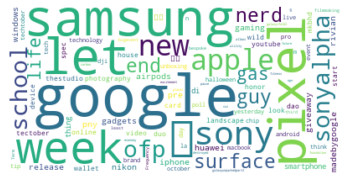

In [15]:
wordcloud = WordCloud(max_words=100, background_color="white").generate(df_fdist.to_string())

# Mostrar gráfico
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams['figure.figsize'] = [500, 500]
plt.show()

## Etiquetado POS

In [17]:
nltk.download('tagsets')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
text_taged = nltk.pos_tag(tokenized_list_text_no_stopwords)
text_taged

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\amaro\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amaro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amaro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('rt', 'NN'),
 ('@mkbhd', 'NNP'),
 ('fun', 'NN'),
 ('fact', 'NN'),
 ('right', 'RB'),
 ('middle', 'JJ'),
 ('#techtober', 'NNP'),
 ('ultimate', 'JJ'),
 ("frisbee's", 'NN'),
 ('club', 'NN'),
 ('national', 'JJ'),
 ('championships', 'NNS'),
 ("i've", 'VBP'),
 ('rt', 'JJ'),
 ('@supersaf', 'CD'),
 ('hear', 'JJ'),
 ('lot', 'NN'),
 ('videos', 'IN'),
 ('dropping', 'VBG'),
 ('today', 'NN'),
 ('🤔', 'NNP'),
 ('#techtober', 'NNP'),
 ('rt', 'NN'),
 ('@mkbhd', 'NNP'),
 ('fun', 'NN'),
 ('fact', 'NN'),
 ('right', 'RB'),
 ('middle', 'JJ'),
 ('#techtober', 'NNP'),
 ('ultimate', 'JJ'),
 ("frisbee's", 'NN'),
 ('club', 'NN'),
 ('national', 'JJ'),
 ('championships', 'NNS'),
 ("i've", 'VBP'),
 ('rt', 'JJ'),
 ('@mkbhd', 'NNP'),
 ('fun', 'NN'),
 ('fact', 'NN'),
 ('right', 'RB'),
 ('middle', 'JJ'),
 ('#techtober', 'NNP'),
 ('ultimate', 'JJ'),
 ("frisbee's", 'NN'),
 ('club', 'NN'),
 ('national', 'JJ'),
 ('championships', 'NNS'),
 ("i've", 'VBP'),
 ('rt', 'JJ'),
 ('@willduwiildu', 'CD'),
 ('hear', 'JJ'),
 ('lot', 

## Lematizacion

In [18]:
#N* -> N
#J* -> A
#V* -> V
#R* -> R
taged_OK = []
for i in range(len(text_taged)):
    if text_taged[i][1][0] == "N":
        text_taged[i] = (text_taged[i][0], "N")
        taged_OK.append(text_taged[i])
    elif text_taged[i][1][0] == "J":
        text_taged[i] = (text_taged[i][0], "A")
        taged_OK.append(text_taged[i])
    elif text_taged[i][1][0] == "V":
        text_taged[i] = (text_taged[i][0], "V")
        taged_OK.append(text_taged[i])
    elif text_taged[i][1][0] == "R":
        text_taged[i] = (text_taged[i][0], "R")
        taged_OK.append(text_taged[i])
taged_OK

[('rt', 'N'),
 ('@mkbhd', 'N'),
 ('fun', 'N'),
 ('fact', 'N'),
 ('right', 'R'),
 ('middle', 'A'),
 ('#techtober', 'N'),
 ('ultimate', 'A'),
 ("frisbee's", 'N'),
 ('club', 'N'),
 ('national', 'A'),
 ('championships', 'N'),
 ("i've", 'V'),
 ('rt', 'A'),
 ('hear', 'A'),
 ('lot', 'N'),
 ('dropping', 'V'),
 ('today', 'N'),
 ('🤔', 'N'),
 ('#techtober', 'N'),
 ('rt', 'N'),
 ('@mkbhd', 'N'),
 ('fun', 'N'),
 ('fact', 'N'),
 ('right', 'R'),
 ('middle', 'A'),
 ('#techtober', 'N'),
 ('ultimate', 'A'),
 ("frisbee's", 'N'),
 ('club', 'N'),
 ('national', 'A'),
 ('championships', 'N'),
 ("i've", 'V'),
 ('rt', 'A'),
 ('@mkbhd', 'N'),
 ('fun', 'N'),
 ('fact', 'N'),
 ('right', 'R'),
 ('middle', 'A'),
 ('#techtober', 'N'),
 ('ultimate', 'A'),
 ("frisbee's", 'N'),
 ('club', 'N'),
 ('national', 'A'),
 ('championships', 'N'),
 ("i've", 'V'),
 ('rt', 'A'),
 ('hear', 'A'),
 ('lot', 'N'),
 ('dropping', 'V'),
 ('today', 'N'),
 ('🤔', 'N'),
 ('#techtober', 'N'),
 ('love', 'V'),
 ('#techtober', 'N'),
 ('rt', 'V'),


In [19]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Importar Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = []
for word, simbol in taged_OK:
    lemmatized.append(wordnet_lemmatizer.lemmatize(word, simbol.lower()))
lemmatized

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amaro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['rt',
 '@mkbhd',
 'fun',
 'fact',
 'right',
 'middle',
 '#techtober',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championship',
 "i've",
 'rt',
 'hear',
 'lot',
 'drop',
 'today',
 '🤔',
 '#techtober',
 'rt',
 '@mkbhd',
 'fun',
 'fact',
 'right',
 'middle',
 '#techtober',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championship',
 "i've",
 'rt',
 '@mkbhd',
 'fun',
 'fact',
 'right',
 'middle',
 '#techtober',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championship',
 "i've",
 'rt',
 'hear',
 'lot',
 'drop',
 'today',
 '🤔',
 '#techtober',
 'love',
 '#techtober',
 'rt',
 '@mkbhd',
 'fun',
 'fact',
 'right',
 'middle',
 '#techtober',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championship',
 "i've",
 'rt',
 '@mkbhd',
 'fun',
 'fact',
 'right',
 'middle',
 '#techtober',
 'ultimate',
 "frisbee's",
 'club',
 'national',
 'championship',
 "i've",
 'rt',
 '@mkbhd',
 'fun',
 'fact',
 'right',
 'middle',
 '#techtober',
 'ultimate',
 "frisbee's",
 'club',
 'national'

### Nube de palabras con lematización

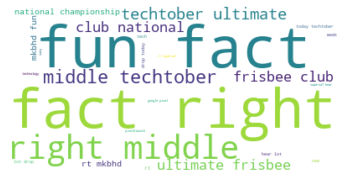

In [20]:
wordcloud = WordCloud(max_words=25, background_color="white").generate(" ".join(lemmatized))

# Mostrar gráfico
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

## Analisis de Sentimientos

In [6]:
import nltk
nltk.download('vader_lexicon')
#conda install -c conda-forge vadersentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Instanciar Analizador
sentiment_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\amaro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
l = []
for i in df["tokenized_text"]:
    l.append(" ".join(i))
df["polaridad"] = l
df

,text,tokenized_text,negative,neutral,positive,result,polaridad
0,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ...",,,,,"RT @MKBHD : Fun fact , right in the middle of ..."
1,RT @SuperSaf: I hear there will be a LOT of vi...,"[RT, @SuperSaf, :, I, hear, there, will, be, a...",,,,,RT @SuperSaf : I hear there will be a LOT of v...
2,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ...",,,,,"RT @MKBHD : Fun fact , right in the middle of ..."
3,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ...",,,,,"RT @MKBHD : Fun fact , right in the middle of ..."
4,RT @willduwiildu: I hear there will be a LOT o...,"[RT, @willduwiildu, :, I, hear, there, will, b...",,,,,RT @willduwiildu : I hear there will be a LOT ...
5,I love #techtober,"[I, love, #techtober]",,,,,I love #techtober
6,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ...",,,,,"RT @MKBHD : Fun fact , right in the middle of ..."
7,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ...",,,,,"RT @MKBHD : Fun fact , right in the middle of ..."
8,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ...",,,,,"RT @MKBHD : Fun fact , right in the middle of ..."
9,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ...",,,,,"RT @MKBHD : Fun fact , right in the middle of ..."


In [10]:
df["negative"] = ""
df["neutral"] = ""
df["positive"] = ""
df["result"] = ""
for index, row in df.iterrows():
    #Analizar cada review
    analisis = sentiment_analyzer.polarity_scores(row['polaridad'])
    row["negative"] = analisis["neg"]
    row["neutral"] = analisis["neu"]
    row["positive"] = analisis["pos"]
    # Evaluar que valores se considerarán positivo o negativo
    if analisis['compound'] > 0.6 :
        row["result"] = "Positive"
    elif analisis['compound'] <  0.6:
        row["result"] = "Negative"
    else :
        row["result"] = "Neutral"
df

,text,tokenized_text,negative,neutral,positive,result,polaridad
0,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ...",0.0,0.794,0.206,Positive,"RT @MKBHD : Fun fact , right in the middle of ..."
1,RT @SuperSaf: I hear there will be a LOT of vi...,"[RT, @SuperSaf, :, I, hear, there, will, be, a...",0.0,1.0,0.0,Negative,RT @SuperSaf : I hear there will be a LOT of v...
2,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ...",0.0,0.794,0.206,Positive,"RT @MKBHD : Fun fact , right in the middle of ..."
3,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ...",0.0,0.794,0.206,Positive,"RT @MKBHD : Fun fact , right in the middle of ..."
4,RT @willduwiildu: I hear there will be a LOT o...,"[RT, @willduwiildu, :, I, hear, there, will, b...",0.0,1.0,0.0,Negative,RT @willduwiildu : I hear there will be a LOT ...
5,I love #techtober,"[I, love, #techtober]",0.0,0.323,0.677,Positive,I love #techtober
6,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ...",0.0,0.794,0.206,Positive,"RT @MKBHD : Fun fact , right in the middle of ..."
7,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ...",0.0,0.794,0.206,Positive,"RT @MKBHD : Fun fact , right in the middle of ..."
8,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ...",0.0,0.794,0.206,Positive,"RT @MKBHD : Fun fact , right in the middle of ..."
9,"RT @MKBHD: Fun fact, right in the middle of #t...","[RT, @MKBHD, :, Fun, fact, ,, right, in, the, ...",0.0,0.794,0.206,Positive,"RT @MKBHD : Fun fact , right in the middle of ..."


In [11]:
df["negative"] = ""
df["neutral"] = ""
df["positive"] = ""
df["result"] = ""
for index, row in df.iterrows():
    #Analizar cada review
    analisis = sentiment_analyzer.polarity_scores(row['polaridad'])
    row["negative"] = analisis["neg"]
    row["neutral"] = analisis["neu"]
    row["positive"] = analisis["pos"]
    # Evaluar que valores se considerarán positivo o negativo
    if analisis['compound'] > 0.4 :
        row["result"] = "Positive"
    elif analisis['compound'] <  -0.2:
        row["result"] = "Negative"
    else :
        row["result"] = "Neutral"
df[["text", "result"]]

,text,result
0,"RT @MKBHD: Fun fact, right in the middle of #t...",Positive
1,RT @SuperSaf: I hear there will be a LOT of vi...,Neutral
2,"RT @MKBHD: Fun fact, right in the middle of #t...",Positive
3,"RT @MKBHD: Fun fact, right in the middle of #t...",Positive
4,RT @willduwiildu: I hear there will be a LOT o...,Neutral
5,I love #techtober,Positive
6,"RT @MKBHD: Fun fact, right in the middle of #t...",Positive
7,"RT @MKBHD: Fun fact, right in the middle of #t...",Positive
8,"RT @MKBHD: Fun fact, right in the middle of #t...",Positive
9,"RT @MKBHD: Fun fact, right in the middle of #t...",Positive


In [22]:
total = len(df["result"])
positive = 0
negative = 0
neutral = 0

for i in df["result"]:
    if i == "Positive":
        positive += 1
    if i == "Neutral":
        neutral += 1
    if i == "Negative":
        negative += 1



print("Total: ",total)
print("Positivas: ",positive)
print("Neutrales: ",neutral)
print("Negativas: ",negative)

Total:  413
Positivas:  271
Neutrales:  128
Negativas:  14
